In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import Bai2b
import Bai5_func

RECORDS_PER_HOUR = 12

e = 2.7

cst = 6.4 * 10 ** (-9)


In [9]:
# dx of CO2

def dx(T_Air, T_Out, v_Wind):
    cap_CO2_Air     = 4.7
    cap_CO2_Top     = 0.97
    CO2_Out         = 668
    g               = 9.81
    P_Blow          = 500000
    
    A_Flr           = 78000
    A_Roof          = 0.18
    A_Side          = 0
    
    phi_ExtCO2      = 430000
    phi_Pad         = 0
    phi_VentForced  = 0
    
    
    diff_T_AirTop   = 1
    diff_rho_AirTop = 0.1
    
    K_ThScr         = 0.00025
    C_d             = 0.65
    C_w             = 0.09
    zeta_InsScr     = 1
    c_leakage       = 0.0001
    
    eta_HeatCO2     = 0.057
    eta_Side        = 0
    eta_Side_Thr    = 0.9
    eta_Roof        = 1
    eta_Roof_Thr    = 0.9
    
    M_CH2O          = 0.03
    h_CBuf          = 1
    Res             = 1.25
    
    h_SideRoof      = cap_CO2_Air / 2
    h_Roof          = cap_CO2_Top
    
    U_Blow          = 0.5
    U_ExtCO2        = 0.5
    U_Pad           = 0.5
    U_ThScr         = 0.5
    U_Roof          = 0.5
    U_Side          = 0.5
    U_ThScr         = 0.5
    U_VentForced    = 0.5
    
    rho_Mean_Air    = 101100 / (287.05 * T_Air)
    diff_T_AirOut   = T_Air - T_Out
    T_Mean_Air      = (T_Air + T_Out) / 2
    
    BlowAir         = np.array([0, 0, Bai2b.MC_BlowAir(eta_HeatCO2, U_Blow, P_Blow, A_Flr)])
    ExtAir          = np.array([0, 0, Bai2b.MC_ExtAir(U_ExtCO2, phi_ExtCO2, A_Flr)])
    PadAir          = Bai2b.MC_PadAir_Lin(U_Pad, phi_Pad, A_Flr, CO2_Out)
    f_ThermalScr    = Bai2b.f_ThScr(U_ThScr, K_ThScr, diff_T_AirTop, g, rho_Mean_Air, diff_rho_AirTop)
    AirTop          = Bai2b.MC_AirTop_Lin(f_ThermalScr)
    f_VentRoofSide_ = Bai2b.f_VentRoofSide(C_d, A_Flr, U_Roof, U_Side, A_Roof, A_Side, g, h_SideRoof, diff_T_AirOut, T_Mean_Air, C_w, v_Wind)
    f_VentRoofSide0 = Bai2b.f_VentRoofSide(C_d, A_Flr, U_Roof, U_Side, 0, A_Side, g, h_SideRoof, diff_T_AirOut, T_Mean_Air, C_w, v_Wind)
    eta_InsulScr    = Bai2b.eta_InsScr(zeta_InsScr)
    f_Leakage       = Bai2b.f_leakage(v_Wind, c_leakage)
    f_VentSide_     = Bai2b.f_VentSide(eta_Side, eta_Side_Thr, eta_InsulScr, f_VentRoofSide0, f_VentRoofSide_, U_ThScr, f_Leakage)
    f_VentForced_   = Bai2b.f_VentForced(eta_InsulScr, U_VentForced, phi_VentForced, A_Flr)
    AirOut          = Bai2b.MC_AirOut_Lin(f_VentSide_, f_VentForced_, CO2_Out)
    P               = Bai2b.Photo_Lin(Res)
    AirCan          = Bai2b.MC_AirCan_Lin(M_CH2O, h_CBuf, P)
    ff_VentRoof_    = Bai2b.ff_VentRoof(C_d, U_Roof, A_Roof, A_Flr, g, h_Roof, diff_T_AirOut, T_Mean_Air, C_w, v_Wind)
    f_VentRoof_     = Bai2b.f_VentRoof(eta_Roof, eta_Roof_Thr, eta_Side, eta_InsulScr, ff_VentRoof_, U_ThScr, f_Leakage)
    TopOut          = Bai2b.MC_TopOut_Lin(f_VentRoof_, CO2_Out)

    result = np.array([(BlowAir + ExtAir + PadAir - AirOut - AirTop - AirCan) / cap_CO2_Air, (AirTop - TopOut) / cap_CO2_Top])    
    return result


In [ ]:
# dx of VP

def dx(T_Air, T_Out, RH_Air, RH_Out, v_Wind):
    #cap
    M_Water             = 18
    h_Air               = 4.9
    R                   = 8314
    h_Top               = 0.2
    A_Flr               = 278
    rho_Air0            = 1.2014
    M_Air               = 28.96
    h_elevation         = 715
    phi_Pad             = 16.7
    chi_Pad             = 0.807
    chi_Out             = 0.78
    r_smin              = 82
    c_pAir              = 880
    LAI                 = 2.5
    Delta_H             = 2450000
    gamma               = 65.8
    r_b                 = 275
    phi_Fog             = 0
    eta_HeatVap         = 4.43e-08
    P_Blow              = 0.5
    K_ThScr             = 0.001
    rho_Mean_Air        = 101100 / (287.05 * T_Air)
    rho_Top             = 101100 / (287.05 * (T_Air + 1))
    C_d                 = 0
    A_Roof              = 0.16
    A_Side              = 0
    h                   = 5.1
    h_SideRoof          = 2.5
    T_Mean_Air          = (T_Air + T_Out) / 2 
    C_w                 = 0
    zeta_InsScr         = 1
    c_leakage           = 0
    h_Roof              = 0.9
    eta_Roof            = 0
    eta_Roof_Thr        = 0
    VP_Out              = Bai5_func.VP_Air(T_Out, RH_Out)
    eta_Side            = 0
    eta_Side_Thr        = 0.9
    phi_VentForced      = 0
    U_MechCool          = 0
    COP_MechCool        = 0
    P_MechCool          = 0
    c_HECin             = 2.21
    A_Cov               = 730


    T_Top               = T_Air + 1
    
    cap_air = Bai5_func.cap_VP_Air(M_Water, h_Air, R, T_Air)
    cap_top = Bai5_func.cap_VP_Top(M_Water, h_Top, R, T_Top)
    
    #Pad
    
    g                   = 9.81
    U_Pad               = 0.5
    eta_Pad             = 0
    
    Rho_Air = Bai5_func.rho_Air(rho_Air0, g, M_Air, h_elevation, R)
    
    F_Pad   = Bai5_func.f_Pad(U_Pad, phi_Pad, A_Flr)
    
    PadAir  =  np.array([0,0, Bai5_func.MV_PadAir(Rho_Air, F_Pad, eta_Pad, chi_Pad, chi_Out)])
    
    AirOut_Pad = Bai5_func.MV_AirOut_Pad_Lin(F_Pad, M_Water, R, T_Air)
    
    #Can
    
    VP_Air_0            = 1.2014
    VP_Top_0            = VP_Air_0
    VP_Can_             = Bai5_func.VP_Can(T_Air + 1)
    r_s                 = r_smin
    VEC                 = Bai5_func.VEC_CanAir(Rho_Air, c_pAir, LAI, Delta_H, gamma, r_b, r_s)
    CanAir = np.array([-VEC, 0, VEC * VP_Can_])
    
    #FogAir
    
    U_Fog               = 0.5
    FogAir = np.array([0, 0, Bai5_func.MV_FogAir(U_Fog, phi_Fog, A_Flr)])
    
    #BlowAir
    
    U_Blow              = 0.5
    BlowAir = np.array([0, 0, Bai5_func.MV_BlowAir(eta_HeatVap, U_Blow, P_Blow, A_Flr)])
    
    #Air - Top - Out
    
    #TopOut
    
    U_ThScr             = 0.5
    rho_Mean_Air        = 101100 / (287.05 * T_Air)
    rho_Top             = rho_Mean_Air + 0.1
    U_Roof              = 0.5
    U_Side              = 0.5
    eta_InsulScr        = Bai5_func.eta_InsScr(zeta_InsScr)
    f_Leakage           = Bai5_func.f_leakage(v_Wind, c_leakage)
    U_VentForced        = 0.5
    ff_VentRoof_ = Bai5_func.ff_VentRoof(C_d, U_Roof, A_Roof, A_Flr, g, h_Roof, T_Air, T_Out, T_Mean_Air, C_w, v_Wind)
    f_VentRoof_  = Bai5_func.f_VentRoof(eta_Roof, eta_Roof_Thr, eta_Side, eta_InsulScr, ff_VentRoof_, U_ThScr, f_Leakage)
    TopOut = Bai5_func.MV_TopOut_Lin(M_Water, R, f_VentRoof_, VP_Out, T_Top, T_Out)
    
    #AirTop
    
    f_ThermalScr = Bai5_func.f_ThScr(U_ThScr, K_ThScr, T_Air, T_Top, g, rho_Mean_Air, Rho_Air, rho_Top)
    AirTop = Bai5_func.MV_AirTop_Lin(M_Water, R, f_ThermalScr, T_Air, T_Top)
    
    #AirOut
    
    f_VentRoofSide_ = Bai5_func.f_VentRoofSide(C_d, A_Flr, U_Roof, U_Side, A_Roof, A_Side, g, h, h_SideRoof, T_Air, T_Out, T_Mean_Air, C_w, v_Wind)
    f_VentRoofSide0 = Bai5_func.f_VentRoofSide(C_d, A_Flr, U_Roof, U_Side, 0, A_Side, g, h, h_SideRoof, T_Air, T_Out, T_Mean_Air, C_w, v_Wind)

    
    f_VentSide_  = Bai5_func.f_VentSide(eta_Side, eta_Side_Thr, eta_InsulScr, f_VentRoofSide0, f_VentRoofSide_, U_ThScr, f_Leakage)
    
    f_VentForced_ = Bai5_func.f_VentForced(eta_InsulScr, U_VentForced, phi_VentForced, A_Flr)
    #####
    AirOut = Bai5_func.MV_AirOut_Lin(M_Water, R, f_VentSide_, f_VentForced_, VP_Out, T_Air, T_Out)
    
    #Air - Mech - ThScr - TopCov,input
    
    #####
    
    T_MechCool          = T_Air + 1
    VP_MechCool         = 0
    
    if VP_Air_0 > VP_MechCool:
        AirMech = np.array([0, 0, 0])
    else:
        HEC_MechAir_    = Bai5_func.HEC_MechAir(U_MechCool, COP_MechCool, P_MechCool, T_Air, T_MechCool, Delta_H, VP_Air_0, VP_MechCool)
        # AirMech_        = MV_AirMech(VP_Air_0, VP_MechCool, HEC_MechAir_)
        AirMech         = np.array([cst * HEC_MechAir_, 0, -cst * HEC_MechAir_ * VP_MechCool]) 
       
#####

    T_ThScr             = T_Air + 1
    VP_ThScr            = 0
    
    HEC_AirThScr_   = Bai5_func.HEC_AirThScr(U_ThScr, T_Air, T_ThScr)
    AirThScr_       = Bai5_func.MV_AirThScr(VP_Air_0, VP_ThScr, HEC_AirThScr_)
    if AirThScr_ == 0:
        AirThScr = np.array([0, 0, 0])
    else:
        AirThScr = np.array([cst * HEC_AirThScr_, 0, -cst * HEC_AirThScr_ * VP_ThScr])

#####
    
    T_Cov_in            = T_Air + 1
    VP_Cov_in           = 0
    VP_Top_0            = 490
    
    HEC_Top_Cov_in_ = Bai5_func.HEC_Top_Cov_in(c_HECin, T_Top, T_Cov_in, A_Cov, A_Flr)
    Top_Cov_in_     = Bai5_func.MV_Top_Cov_in(VP_Top_0, VP_Cov_in, HEC_Top_Cov_in_)
    if Top_Cov_in_ == 0:
        Top_Cov_in = np.array([0, 0, 0])
    else:
        Top_Cov_in = np.array([0, cst * HEC_Top_Cov_in_, -cst * HEC_AirThScr_ * VP_ThScr])
    
    #####
    
    result = np.array([(CanAir + PadAir + FogAir + BlowAir - AirThScr - AirTop - AirOut - AirOut_Pad - AirMech)/cap_air , (AirTop - Top_Cov_in - TopOut)/cap_top])
    return result


In [3]:
def Euler(a, air, top, h, NumOfStep):
    t = 0
    i = 1
    AIR = 0
    TOP = 0
    while i <= NumOfStep:
        t += h
        AIR = air + h * a[0].dot([ air, top, 1 ])
        TOP = top + h * a[1].dot([ air, top, 1 ])
        air = AIR
        top = TOP
        i += 1
    return np.array([AIR, TOP])

def rk4(a, air, top, h, NumOfStep):
    t = 0
    i = 1
    AIR = 0
    TOP = 0
    while i <= NumOfStep:
        t += h
        k1 = a[0].dot([ air, top, 1 ])
        k2 = a[0].dot([ air+k1*h/2, top+k1*h/2, 1 ])
        k3 = a[0].dot([ air+k2*h/2, top+k2*h/2, 1 ])
        k4 = a[0].dot([ air+k3*h,   top+k3*h,   1 ])
        AIR = air + (k1 + 2*k2 + 2*k3 + k4)*h/6
        
        k1 = a[1].dot([ air, top, 1 ])
        k2 = a[1].dot([ air+k1*h/2, top+k1*h/2, 1 ])
        k3 = a[1].dot([ air+k2*h/2, top+k2*h/2, 1 ])
        k4 = a[1].dot([ air+k3*h,   top+k3*h,   1 ])
        TOP = top + (k1 + 2*k2 + 2*k3 + k4)*h/6
        
        air = AIR
        top = TOP
        i += 1
    return np.array([AIR, TOP])


In [4]:
gh_data = pd.read_csv('Greenhouse_climate.csv').fillna(method='pad').fillna(method='bfill')
gh_data

,AssimLight,BlackScr,CO2air,EnScr,GHtime,HumDef,PipeGrow,PipeLow,RHair,Tair,VentLee,Ventwind
0,0.0,0.0,438.000000,0.0,43326.000000,3.05,0.0,0.0,82.4,20.1,0.0,1.200000e+00
1,0.0,0.0,438.000000,0.0,43326.003472,3.05,0.0,0.0,82.4,20.1,0.0,1.200000e+00
2,0.0,0.0,438.000000,0.0,43326.006944,3.05,0.0,0.0,82.4,20.1,0.0,1.200000e+00
3,0.0,0.0,443.000000,0.0,43326.010417,3.00,0.0,0.0,82.9,20.3,0.0,0.000000e+00
4,0.0,0.0,429.000001,0.0,43326.013889,2.95,0.0,0.0,83.1,20.2,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
33128,0.0,95.0,475.000000,95.0,43441.027778,1.98,0.0,40.0,88.3,19.7,10.2,0.000000e+00
33129,0.0,95.0,480.000000,95.0,43441.031250,1.97,0.0,38.9,88.3,19.6,10.2,0.000000e+00
33130,0.0,95.0,477.000000,95.0,43441.034722,1.91,0.0,39.6,88.8,19.8,11.6,4.023313e-08
33131,0.0,95.0,481.999999,95.0,43441.038194,1.94,0.0,39.7,88.6,19.8,12.0,5.999999e-01


In [5]:
en_data = pd.read_csv('meteo.csv').fillna(method='pad').fillna(method='bfill')
en_data

,time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
0,8/14/2018,13.369189,0.0,0.0,-32.000000,0.0,0.000000e+00,87.8,17.7,32.0,3.2
1,8/14/2018,13.369189,0.0,0.0,-32.000000,0.0,0.000000e+00,87.8,17.7,32.0,3.2
2,8/14/2018,13.369189,0.0,0.0,-32.000000,0.0,0.000000e+00,87.8,17.7,32.0,3.2
3,8/14/2018,13.389380,0.0,0.0,-36.000000,0.0,0.000000e+00,87.4,17.8,32.0,3.2
4,8/14/2018,13.455197,0.0,1.0,-38.999999,0.0,0.000000e+00,87.3,17.9,32.0,3.2
...,...,...,...,...,...,...,...,...,...,...,...
33128,12/7/2018,10.093596,0.0,0.0,-3.000000,0.0,1.000000e+00,96.7,11.6,32.0,9.8
33129,12/7/2018,10.093596,0.0,0.0,-2.000000,0.0,1.000000e+00,96.7,11.6,32.0,10.1
33130,12/7/2018,10.019657,0.0,0.0,-3.000000,0.0,9.999999e-01,96.6,11.5,32.0,10.1
33131,12/7/2018,10.083210,0.0,0.0,-2.000000,0.0,1.340000e-07,96.6,11.6,32.0,10.1


In [6]:

# See data for the next 2 hours
time_period = 7 * 24 * RECORDS_PER_HOUR

# ppm to mg/m3 and
# Celsius to Kelvin
data = pd.DataFrame({
    'CO2_Air' : gh_data.CO2air[:time_period] * 44 / 24.45,
    'T_Air' : gh_data.Tair[:time_period] + 273,
    'T_Out' : en_data.Tout[:time_period] + 273,
    'RH_Air' : gh_data.RHair[:time_period],
    'RH_Out' : en_data.Rhout[:time_period],
    'v_Wind' : en_data.Windsp[:time_period]
})

# plt.plot(data.CO2_Air / 1000)
# plt.plot(data.T_Air)
# plt.plot(data.T_Out)

#plt.legend(['co2', 'Tair', 'Tout'])


In [10]:
# For CO2

# co2_air_pred = [data.loc[0, 'CO2_Air'], ]
# co2_top_pred = [data.loc[0, 'CO2_Air'], ]

co2_air_pred = [375, ]
co2_top_pred = [375, ]

co2air = co2_air_pred[0]
co2top = co2air

for stamp in range(time_period):
    # Take out the data
    row = data.loc[stamp]
    exact_T_Air = row.T_Air
    exact_T_Out = row.T_Out
    exact_v_Wind = row.v_Wind

    # Load into dx
    A = dx(exact_T_Air, exact_T_Out, exact_v_Wind)
    # This returns approximations for the next 5 mins
    B = rk4(A, co2air, co2top, 1, 300)

    co2_air_pred.append(B[0])
    co2_top_pred.append(B[1])

    co2air = B[0]
    co2top = B[1]


In [ ]:
# For VP

vp_air_pred = [3800000, ]
vp_top_pred = [3800000, ]

vpair = vp_air_pred[0]
vptop = vpair

for stamp in range(time_period):
    # Take out the data
    row = data.loc[stamp]
    exact_T_Air = row.T_Air
    exact_T_Out = row.T_Out
    exact_RH_Air = row.RH_Air
    exact_RH_Out = row.RH_Out
    exact_v_Wind = row.v_Wind

    # Load into dx
    A = dx(exact_T_Air, exact_T_Out, exact_RH_Air, exact_RH_Out, exact_v_Wind)
    # This returns approximations for the next 5 mins
    B = rk4(A, vpair, vptop, 1, 300)

    vp_air_pred.append(B[0])
    vp_top_pred.append(B[1])

    vpair = B[0]
    vptop = B[1]


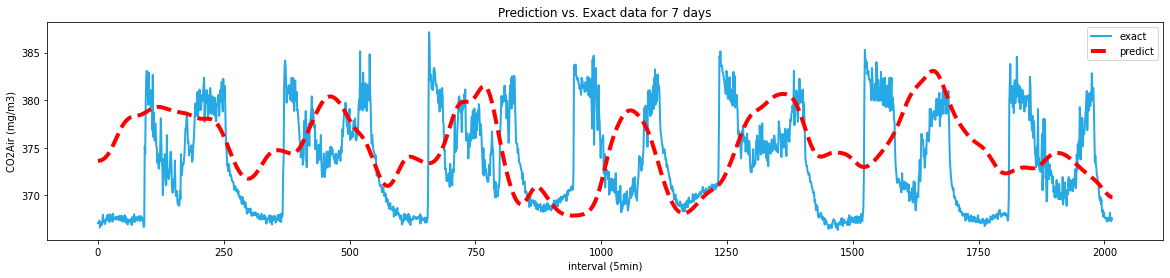

In [11]:
from scipy.ndimage import gaussian_filter

plt.figure(figsize=(20, 4))

co2_air_aligned = (data.CO2_Air + 12060) / 35

fault_pred = gaussian_filter(co2_air_pred, sigma=15)
fault_co2 = gaussian_filter(co2_air_aligned, sigma=15)
# Smooooothed data
plt.plot(co2_air_aligned, '#27A9E6', linewidth=2, label='exact')
# plt.plot(fault_co2, '#27A9E6', linewidth=2)

# plt.plot(co2_air_pred, 'r--', linewidth=4)
plt.plot(fault_pred, 'r--', linewidth=4, label='predict')

plt.title('Prediction vs. Exact data for 7 days')
plt.xlabel('interval (5min)')
plt.ylabel('CO2Air (mg/m3)')
plt.legend()
plt.show()

# fig, axes = plt.subplots(2, sharex=True, figsize=(16, 8))
# fig.suptitle('Prediction')

# axes[0].plot(co2_air_pred)
# axes[1].plot(data.CO2_Air)
# plt.show()


In [ ]:
from scipy.ndimage import gaussian_filter

plt.figure(figsize=(20, 4))

fault_pred = gaussian_filter(vp_air_pred, sigma=15)
# Smooooothed data

# plt.plot(vp_air_pred, 'r', linewidth=3)
plt.plot(fault_pred, 'r--', linewidth=3, label='predict')

plt.title('Prediction for 7 days')
plt.xlabel('interval (5min)')
plt.ylabel('VPAir (Pa)')
plt.legend()
plt.show()

In [ ]:
save_to_csv = pd.DataFrame({
    'time' : pd.Series(np.arange(time_period + 1)),
    'CO2air' : pd.Series(co2_air_pred),
    'CO2top' : pd.Series(co2_top_pred)
})

save_to_csv.to_csv('predict_temp.csv', index=False)